In [3]:
import numpy as np
import pandas as pd                                  # for data wrangling and analysis
import mglearn

import sklearn as sk                                 # for machine learning
from sklearn.model_selection import train_test_split # split data into 75% training & 25% test sets
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colormaps
# list(colormaps)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer_df = load_breast_cancer()
print('Cancer dataset keys: {}'.format(cancer_df.keys()))

cancer = pd.DataFrame(cancer_df['data'], columns = cancer_df['feature_names'])
cancer = cancer.assign(y = cancer_df['target'])
cancer['outcome'] = cancer['y'].map({1:'malignant', 0:'benign'})
print("Sample counts per class:{}".format({n: v for n, v in zip(cancer['outcome'], np.bincount(cancer['y']))}))

display(cancer.iloc[:5])

Cancer dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:{'benign': 357}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,benign


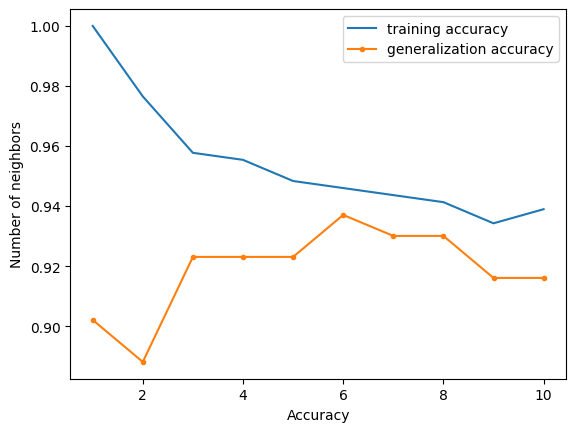

In [17]:
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(cancer_df['data'], cancer_df['target'], random_state=66, stratify=cancer_df['target'])

train_accuracy = [] # training accuracy
test_accuracy = []  # test (generalization) accuracy
num_neighbors = range(1, 11) # between 1 and 10

for neighbors in num_neighbors:
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_cancer_train, y_cancer_train)
    train_accuracy.append(clf.score(X_cancer_train, y_cancer_train))
    test_accuracy.append(clf.score(X_cancer_test, y_cancer_test))

plt.plot(num_neighbors, train_accuracy, label = 'training accuracy')
plt.plot(num_neighbors, test_accuracy, label = 'generalization accuracy', marker = '.')
plt.xlabel('Accuracy')
plt.ylabel('Number of neighbors')
plt.legend()